<center> <h1> Training the one-class svm</h1>

<b>Autor:</b> Edwin Rueda <br>
<b>email:</b> ejrueda95g@gmail.com <br>
<b>github:</b> https://github.com/ejrueda <br>
<b>website:</b> http://edwinrueda.com/ <br>
<b> You can cite this work with</b>:

@software{edwin_rueda_2020_3843381,<br>
  author       = {Edwin Rueda},<br>
  title        = {ejrueda/MasterUFPA: zenodo release},<br>
  month        = may,<br>
  year         = 2020,<br>
  publisher    = {Zenodo},<br>
  version      = {zenodo},<br>
  doi          = {10.5281/zenodo.3843381},<br>
  url          = {https://doi.org/10.5281/zenodo.3843381}<br>
}

### Notes
- to select the best initial paramenters, we do a cross-validation (https://scikit-learn.org/stable/modules/cross_validation.html)
- the indT gene is not taken into account due to the coefficient of variation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utilities import EdwinRueda_utils
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
reference_genes = open("../data/reference_genes.txt").read().splitlines()
print("reference genes:", reference_genes)

reference genes: ['cysG', 'hcaT', 'idnT', 'rrsA', 'ihfB', 'ssrA', 'gyrA', 'recA', 'rpoB', 'rpoA', 'gyrB', 'rho', 'ftsZ', 'secA', 'rpoC', 'gmk', 'adk', 'rpoD', 'dnaG', 'glnA', 'recF']


In [3]:
data = pd.read_csv("../data/all_counts_9_norm_rpkm_log2_preprocessed.csv", index_col=0)
data.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,5.542667,5.876225,5.189101,6.178741,6.258982,5.921482,6.565341,6.308676,6.256590
aaeB,5.627977,5.436188,5.397088,5.493631,5.603751,5.716862,5.840627,6.132819,5.896502
aaeR,5.645506,5.758852,5.107190,5.824890,5.487705,6.033795,5.710782,6.302440,16.270368
aaeX,6.081770,6.043589,6.030808,6.358792,15.682419,6.129392,6.042647,6.134309,15.797839
aas,6.224669,6.297153,6.297008,6.047021,6.038410,6.296795,6.295251,6.598525,6.568365


In [4]:
data_train = data.reindex(reference_genes).dropna()
data_train

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,5.903687,5.879490,5.873191,5.735536,6.016590,6.328393,6.315338,6.504277,6.577601
hcaT,5.692781,5.733848,5.686571,5.925712,6.290692,6.131968,6.113390,5.891730,5.822536
rrsA,10.498560,10.775182,11.515848,11.819169,11.745607,11.033925,10.521316,8.685239,10.590185
ihfB,11.625723,11.784312,12.694811,13.119308,13.096534,12.574847,12.140031,10.126885,11.298441
ssrA,12.889916,13.026561,13.839784,14.807551,14.601034,13.858224,14.509441,12.713618,13.816964
gyrA,19.364537,19.544602,10.195372,19.601927,19.576949,18.693722,17.988391,16.700954,17.802523
recA,16.741059,16.808839,17.125494,11.214665,10.997956,10.271486,19.879175,18.190008,19.661178
rpoB,8.974988,19.071784,10.029701,19.552264,19.479836,18.539912,8.439041,16.884159,18.085799
rpoA,12.169900,12.425077,13.123721,12.536993,12.467720,11.604108,11.477677,19.684894,11.166540


#### data scaling

In [5]:
scaler = EdwinRueda_utils.scaler(xmin=-1, xmax=1)
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_train.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-1.000000,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959573,-1.000000,-1.000000,-1.000000,-1.000000
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266109,0.174393,0.219843,-0.010831,0.155377


#### testing a one-class classifier based on support vector machine
- One-class svm (see: https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html?highlight=one%20class%20svm#sklearn.svm.OneClassSVM)
- the dataset is separated id two sets (70% to train the model and 30% to test the model)

In [6]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

#separating the dataset into train and test data
X_train, X_test = train_test_split(data_train, test_size=.3)
print("train size:", X_train.shape)
print("test size:", X_test.shape)
#creating a one-class classifier based on svm
ocsvm = OneClassSVM(kernel="rbf", nu=.001, gamma="auto")

train size: (14, 9)
test size: (6, 9)


In [7]:
X_train

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
gmk,0.847327,0.829193,0.879836,0.924415,0.901414,0.861127,0.754092,0.691702,0.777656
rho,-0.463635,1.000000,-0.322867,-0.354728,-0.370598,1.000000,0.897256,0.716092,0.889612
recA,0.616219,0.599711,0.632131,-0.209725,-0.265305,-0.370792,1.000000,0.783242,1.000000
rpoD,-0.587275,0.875689,0.957770,0.930312,0.914462,0.859728,0.772118,0.642927,0.771255
rpoB,-0.519856,0.926579,-0.380312,0.992837,0.985677,0.886011,-0.662111,0.593895,0.772322
secA,0.675691,0.645251,0.734029,0.714331,0.689364,0.643299,0.560308,0.514372,-0.874390
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
adk,0.815926,0.805193,0.838952,0.841010,0.799706,0.790783,0.617589,0.564826,0.659230


In [8]:
def ocsvm_score(estimator, X, y):
    """
    this function compute the recall score obtained in a one-class classifier.
    this function is used as an argument in cross validation
    inputs:
        estimator: trained estimator
        X: test data
        y: target
    """
    return  sum(estimator.predict(X)==1)/(sum(estimator.predict(X)==1) + sum(estimator.predict(X)!=1))

In [9]:
cross_score = cross_val_score(ocsvm, X_train, y=np.ones(X_train.shape[0]), cv=3,
                              n_jobs=3, scoring=ocsvm_score, verbose=5)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.5s finished


In [10]:
cross_score

array([0.  , 0.6 , 0.25])

In [11]:
ocsvm.fit(X_train)
test_score = ocsvm_score(ocsvm, X_test, np.ones(X_test.shape[0]))
print(test_score)

0.3333333333333333


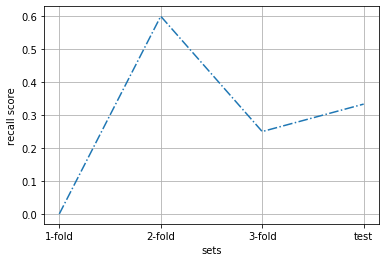

In [12]:
x = range(4)
plt.plot(x, np.concatenate((cross_score, np.array([test_score]))), linestyle="-.");
plt.xticks(x, ["1-fold", "2-fold", "3-fold", "test"])
plt.xlabel("sets")
plt.ylabel("recall score")
plt.grid()

#### testing with different partitions in the training set

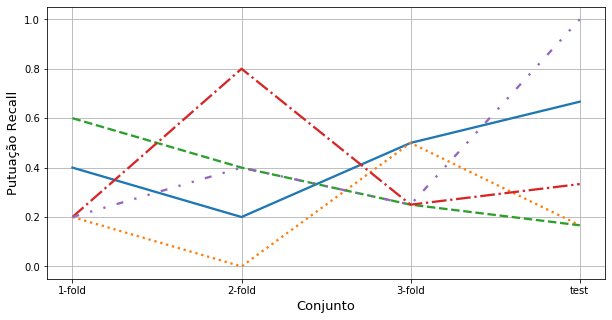

In [14]:
from bokeh.palettes import Category10
colors= Category10[5]
line_style = ["solid", "dotted", "dashed", "dashdot",(0, (3, 5, 1, 5, 1, 5))]
x_ticks = []
plt.figure(figsize=(10,5))
num_folds = 3
x = range(num_folds+1)
for k in range(5):
    X_train, X_test = train_test_split(data_train, test_size=.3)
    ocsvm = OneClassSVM(kernel="rbf", nu=.001, gamma="auto")
    cross_score = cross_val_score(ocsvm, X_train, y=np.ones(X_train.shape[0]), cv=num_folds,
                              n_jobs=3, scoring=ocsvm_score, verbose=0)
    ocsvm.fit(X_train)
    test_score = ocsvm_score(ocsvm, X_test, np.ones(X_test.shape[0]))
    plt.plot(x, np.concatenate((cross_score, np.array([test_score]))), color=colors[k],
             linestyle=line_style[k], linewidth=2.3,);
plt.grid(axis="both")
[x_ticks.append(str(1+i)+"-fold") for i in range(3)]
x_ticks.append("test")
plt.xticks(x, x_ticks)
plt.xlabel("Conjunto", fontsize=13)
plt.ylabel("Putuação Recall", fontsize=13);